# Introduction

students: <br>
Moran Shemesh <br> 
Aviv Lazar <br> 
<br>

Challenge: <br>
Name: Text Summarization <br>
definition: In text summarization, a model needs to create a shorter text than the original one, and represent the main information of the source text. <br>
<br>

There are two main attitudes for models which solve the challenge: <br>
1) Extractive models: where the model’s summary is produced by sentences from the source text. <br>
2) Abstractive models: where the model’s summary is produced by its own vocabulary. <br>

In our work, we show two models: one extractive and one abstractive, when one will be our main model (Bart), and the second one is the baseline (TextRank).

# Installations & Imports:

For transformers error, there is need to reinstall folium version 0.2.1:

In [ ]:
!pip install folium==0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.4 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=79f301bec3a1ae31e7560183b821d0f36f70a334cbde9a10aeca218df898d6fd
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [ ]:
!pip install transformers datasets accelerate nvidia-ml-py3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 6.9 MB/s 
     |████████████████████████████████| 362 kB 70.4 MB/s 
     |████████████████████████████████| 117 kB 72.4 MB/s 
     |████████████████████████████████| 6.6 MB 47.6 MB/s 
     |████████████████████████████████| 596 kB 66.5 MB/s 
     |████████████████████████████████| 101 kB 11.4 MB/s 
     |████████████████████████████████| 1.1 MB 64.7 MB/s 
     |████████████████████████████████| 140 kB 32.5 MB/s 
     |████████████████████████████████| 212 kB 77.4 MB/s 
     |████████████████████████████████| 127 kB 71.7 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 271 kB 56.9 MB/s 
     |████████████████████████████████| 144 kB 58.1 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=1a32aaa185021c2f859db5c2e15307b780d18c3adba1cec8f

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 7.3 MB/s 
     |████████████████████████████████| 106 kB 70.3 MB/s 


In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import nltk
import contractions
import sys
import re
from nltk.corpus import stopwords
import numpy as np
import transformers
from rouge import Rouge
import math
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import rouge

import string  
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

# For collecting the data about: train/validation/test sets, models
from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


For data' leaning - download stopwords:

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Get data

Connect to google colab

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Download from Git (Raw Data) - NOT USED!

In [ ]:
# %cd "/content/drive/MyDrive/HIT/NLP/Final_Project/cnn_daily_mail_dataset"

In [ ]:
# !git clone https://github.com/abisee/cnn-dailymail.git

### Download from kaggle (Processed Data)
Instructions: <br>
https://medium.com/analytics-vidhya/how-to-directly-download-kaggle-dataset-to-google-drive-aa06175712e2

In [ ]:
#Configuration environment

# os.environ['KAGGLE_USERNAME'] = "avivlazar" # username from the json file
# os.environ['KAGGLE_KEY'] = "9f02c87e9cc8f4f5caf86706f8fe534d" # key from the json file

# !kaggle datasets download -d gowrishankarp/newspaper-text-summarization-cnn-dailymail

In [ ]:
# %cd "/content/drive/MyDrive/HIT/NLP/Final_Project/cnn_daily_mail_dataset/kaggle/cnn_dailymail"

In [ ]:
# %ls

In [ ]:
# !unzip cnn_dailymail.zip # -d /content/drive/MyDrive/HIT/NLP/Final_Project/cnn_daily_mail_dataset/kaggle/cnn_dailymail

NOT USED: <br>
First algorithm we looked for understanding a possible way which also very simple: <br>
https://www.kaggle.com/code/rakshithanil/textsummarization-simple-heapq-transformers



# Step 1: Read Data

In [ ]:
kaggle_dir = f"/content/drive/MyDrive/HIT/NLP/Final_Project/cnn_daily_mail_dataset/kaggle/cnn_dailymail"

def read_orig_data(type, num_samples=-1):
  if num_samples > 0:
    return pd.read_csv(f'{kaggle_dir}/orig_data/{type}.csv', nrows=num_samples)
  else:
    return pd.read_csv(f'{kaggle_dir}/orig_data/{type}.csv')

def read_clean_data(type, num_samples=-1):
  if num_samples > 0:
    return pd.read_csv(f'{kaggle_dir}/clean_data/{type}.csv', nrows=num_samples)
  else:
    return pd.read_csv(f'{kaggle_dir}/clean_data/{type}.csv')

In [ ]:
dummy_train_df = read_orig_data('train', num_samples=10)
dummy_train_df.head(10)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
5,0004306354494f090ee2d7bc5ddbf80b63e80de6,He's been accused of making many a fashion fau...,Prime Minister and his family are enjoying an ...
6,0005d61497d21ff37a17751829bd7e3b6e4a7c5c,By . Daily Mail Reporter . PUBLISHED: . 01:15 ...,NBA star calls for black and Hispanic communit...
7,0006021f772fad0aa78a977ce4a31b3faa6e6fe5,By . Daily Mail Reporter . This is the moment ...,London Midland service had been pulling into T...
8,00083697263e215e5e7eda753070f08aa374dd45,There are a number of job descriptions waiting...,Tony Pulis believes Saido Berahino should look...
9,000940f2bb357ac04a236a232156d8b9b18d1667,"Canberra, Australia (CNN) -- At first glance, ...",Black box data from Flight 370 could be analyz...


We don't need the id column:

In [ ]:
dummy_train_df = dummy_train_df.drop(['id'],axis=1)

In [ ]:
dummy_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     10 non-null     object
 1   highlights  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


# Analysis Data

Analizing the data:<br>
Count words<br>
Count sentences<br>
<br>
Full analysis: https://towardsdatascience.com/text-summarization-with-nlp-textrank-vs-seq2seq-vs-bart-474943efeb09

In [ ]:
def add_count_columns(df_analyzed):
  article_words_count = []
  highlights_words_count = []
  article_sentences_count = []
  highlights_sentences_count = []

  for i in range(len(df_analyzed)):
    # words count:
    article_words_count.append(len(df_analyzed['article'].str.lower().str.split()[i]))
    highlights_words_count.append(len(df_analyzed['highlights'].str.lower().str.split()[i]))
    # sentences count:
    article_sentences_count.append(len(sent_tokenize(df_analyzed['article'].str.lower()[i])))
    highlights_sentences_count.append(len(sent_tokenize(df_analyzed['highlights'].str.lower()[i])))

  # add counts columns to df:
  df_analyzed['article_words_count'] = article_words_count
  df_analyzed['highlights_words_count'] = highlights_words_count
  df_analyzed['article_sentences_count'] = article_sentences_count
  df_analyzed['highlights_sentences_count'] = highlights_sentences_count

In [ ]:
# clean_train_df = pd.read_csv(f'{kaggle_dir}/clean_data/train.csv')

In [ ]:
dummy_train_df_analyzed = dummy_train_df

add_count_columns(dummy_train_df_analyzed)
print(dummy_train_df_analyzed)

                                             article  \
0  By . Associated Press . PUBLISHED: . 14:11 EST...   
1  (CNN) -- Ralph Mata was an internal affairs li...   
2  A drunk driver who killed a young woman in a h...   
3  (CNN) -- With a breezy sweep of his pen Presid...   
4  Fleetwood are the only team still to have a 10...   
5  He's been accused of making many a fashion fau...   
6  By . Daily Mail Reporter . PUBLISHED: . 01:15 ...   
7  By . Daily Mail Reporter . This is the moment ...   
8  There are a number of job descriptions waiting...   
9  Canberra, Australia (CNN) -- At first glance, ...   

                                          highlights  article_words_count  \
0  Bishop John Folda, of North Dakota, is taking ...                  198   
1  Criminal complaint: Cop used his role to help ...                  392   
2  Craig Eccleston-Todd, 27, had drunk at least t...                  808   
3  Nina dos Santos says Europe must be ready to a...                  531  

# Preprocessing: Clean the data

Example for cleaning CNN/Daily-Mail: <br>
https://machinelearningmastery.com/prepare-news-articles-text-summarization/

Let's show some examples of how our data looks like

In [ ]:
train_df = read_orig_data('train')

In [ ]:
train_df.info

<bound method DataFrame.info of                                               id  \
0       0001d1afc246a7964130f43ae940af6bc6c57f01   
1       0002095e55fcbd3a2f366d9bf92a95433dc305ef   
2       00027e965c8264c35cc1bc55556db388da82b07f   
3       0002c17436637c4fe1837c935c04de47adb18e9a   
4       0003ad6ef0c37534f80b55b4235108024b407f0b   
...                                          ...   
287108  fffdfb56fdf1a12d364562cc2b9b1d4de7481dee   
287109  fffeecb8690b85de8c3faed80adbc7a978f9ae2a   
287110  ffff5231e4c71544bc6c97015cdb16c60e42b3f4   
287111  ffff924b14a8d82058b6c1c5368ff1113c1632af   
287112  ffffd563a96104f5cf4493cfa701a65f31b06abf   

                                                  article  \
0       By . Associated Press . PUBLISHED: . 14:11 EST...   
1       (CNN) -- Ralph Mata was an internal affairs li...   
2       A drunk driver who killed a young woman in a h...   
3       (CNN) -- With a breezy sweep of his pen Presid...   
4       Fleetwood are the only team st

In [ ]:
def print_with_line_limit(text, limit=100):
  print(re.sub(f"(.{{{limit}}})", "\\1\n", text, 0, re.DOTALL), end='\n\n')

def print_selected_articles(df, num_samples=10):
  nrows = df.shape[0]
  jump = math.floor(nrows / num_samples)
  selected_articles = [i for i in range(0, nrows, jump)]
  filtered_df = df.iloc[selected_articles]

  for _, values in filtered_df[['article']].iterrows():
    cur_article = values['article']
    print(f"Article length: {len(cur_article)}")
    # print(re.sub("(.{100})", "\\1\n", cur_article, 0, re.DOTALL), end='\n\n')
    print_with_line_limit(cur_article)

In [ ]:
print_selected_articles(train_df)

Article length: 1211
By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 Octob
er 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds 
of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and
 early October. The state Health Department has issued an advisory of exposure for anyone who attend
ed five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in N
orth Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown t
o the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but offici
als feel it's important to alert people to the possible exposure. The diocese announced on Monday th
at Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he 
contracted the infection through contaminated food while attending a c

As seen above, some of the chosen samples are short, ~1,200 chars, and some of them more than ~8,000 chars, and there are some which have more than 10,000 chars!

In [ ]:
def print_selected_articles_prefix_suffix(df, num_samples=12, only_prefix=False):
  nrows = df.shape[0]
  jump = math.floor(nrows / num_samples)
  selected_articles = [i for i in range(0, nrows, jump)]
  filtered_df = df.iloc[selected_articles]

  preffix_list = []
  suffix_list = []
  for _, values in filtered_df[['article']].iterrows():
    cur_article = values['article']
    preffix_list.append(cur_article[:120])
    suffix_list.append(cur_article[-120:])
  
  print("Preffix:")
  for pre in preffix_list:
    print(f"{pre}")

  if not only_prefix:
    print("\nSuffix:")
    for suf in suffix_list:
      print(f"{suf}")

In [ ]:
print_selected_articles_prefix_suffix(train_df, num_samples=10)

Preffix:
By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop
Alex Oxlade-Chamberlain forgot about England's team huddle moments before kick-off as Roy Hodgson's side beat Scotland 3
By . Associated Press and Anthony Bond . PUBLISHED: . 22:08 EST, 1 August 2013 . | . UPDATED: . 07:47 EST, 2 August 2013
Mogadishu, Somalia (CNN) -- Somalia's top militant group may soon counter the government's recent thrust against them wi
(CNN) -- Brad Pitt has a warning for his accused attacker, Vitalii Sediuk: "If he tries to look up a woman's dress again
Created: . 23:04 EST, 26 February 2015 . This is the moment a benefits cheat was caught on camera lugging around wood wh
By . Helen Collis . PUBLISHED: . 07:16 EST, 2 September 2013 . | . UPDATED: . 11:53 EST, 2 September 2013 . It was a per
The world's fattest man has revealed he has not been able to leave his home for the past ten years. Keith Martin said he
By . Daniel Miller . PU

As we notify, the most problematic part in text is thier prefix. We created a method which should deal with most of the problematic prefixes. <br>
NOTE: we didn't had the chance to look at all the data, because of its humangous size. But we took 200 smaples from different locations in data, which some prefixes were repeated on themselves. 

In [ ]:
def clean_CNN_from_prefix(txt):
  return txt[5:] if txt[:5] == '(CNN)' else txt

def regex_clean(df):
  reg_words = '[\w\\+|\s]*'
  date = f'[0-9]+\:[0-9]+\s+{reg_words},\s+[0-9]+{reg_words}\s+[0-9]+'
  spacer = '\s\.\s'

  # Example: 'By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . '
  # 'PUBLISHED: . 10:10 EST, 30 June 2013 . | . UPDATED: . 02:30 EST, 1 July 2013 . '
  regex_1 = f'PUBLISHED:{spacer}{date}{spacer}\|{spacer}UPDATED:{spacer}{date}{spacer}'
  # UPDATED: . 03:12 EST, 8 February 2012 . 
  regex_2 = f'UPDATED:{spacer}{date}{spacer}'
  # Example: 'By . Eleanor Crooks, Press Association . '
  regex_3 = f'By{spacer}{reg_words},\sPress Association\s\.\s'
  # Example: 'By . Daily Mail Reporter . '
  regex_4 = f'By{spacer}{reg_words}\.\s'
  # Example: 'By SAM TAYLOR FOR THE DAILY MAIL . '
  regex_5 = f'By[\s\w\\+]+{spacer}'
  # Example: 'Canberra, Australia (CNN) -- ', 'London (CNN)  -- ', 'WASHINGTON (CNN)  -- ', '(CNN)  -- ', 
  regex_6 = f'[A-Z][a-z]+,\s[A-Z][a-z]+\s+\(CNN\)\s+--\s'
  regex_7 = f'[A-Z]+[a-z]*\s+\(CNN\)\s+--\s'
  regex_8 = f'\(CNN\)\s+--\s'
  # Example: '(CNN) -- '
  regex_9 = f'\([\w\\+|\.|\s]*\)\s--\s'
  # The rest: 'and Michael Zennie . ', 'and Reuters .'
  regex_10 = f'and[\s[A-Za-z]+]*\s.\s'

  print(f"start copy df")
  df_filttered = df.copy()

  reg_dict = {'reg_1' : regex_1,
              'reg_2' : regex_2,
              'reg_3' : regex_3,
              'reg_4' : regex_4,
              'reg_5' : regex_5,
              'reg_6' : regex_6,
              'reg_7' : regex_7,
              'reg_8' : regex_8,
              'reg_9' : regex_9,
              'reg_10' : regex_10}

  for i in range (1, len(reg_dict)+1):
    reg_name = f'reg_{i}'
    print(f'start working on {reg_name}')
    cur_reg = reg_dict[reg_name]
    df_filttered['article'] = df_filttered['article'].str.replace(f'({cur_reg})', '', regex=True)

  # clean '\n'
  df_filttered['article'] = df_filttered['article'].str.replace(f'(\n)', ' ', regex=True)

  # clean (CNN) in the beginning
  print('Start \'(CNN)\' clean')
  df_filttered['article'] = df_filttered.apply(lambda x: clean_CNN_from_prefix(x['article']),axis=1)

  # clean the highlights
  df_filttered['highlights'] = df_filttered['highlights'].str.replace(f'(\n)', ' ', regex=True)

  return df_filttered
  

For testing regex correctness:

In [ ]:
# print_selected_articles_preffix_suffix(train_df, num_samples=50)

In [ ]:
clean_train_df = train_df.copy()

In [ ]:
# train_df_filttered['article'] = train_df_filttered['article'].str.replace(f'({regex_1})', '', regex=True)

In [ ]:
# print_selected_articles_preffix_suffix(train_df_filttered, num_samples=200, only_prefix=True)

Start clean train data by regex

In [ ]:
# clean_train_df = regex_clean(clean_train_df)

In [ ]:
# train_df['article'][0]

In [ ]:
# clean_train_df['article'][0]

In [ ]:
def write_clean_data(df, type):
  if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
  df.to_csv(f'{kaggle_dir}/clean_data/{type}.csv' , index=False)

In [ ]:
# write_clean_data(clean_train_df, 'train')

Same clean we do for validation and test sets:

In [ ]:
val_df = read_orig_data('validation')
test_df = read_orig_data('test')

In [ ]:
# clean_val_df = regex_clean(val_df)
# clean_test_df = regex_clean(test_df)

In [ ]:
# write_clean_data(clean_val_df, 'validation')
# write_clean_data(clean_test_df, 'test')

# Validation-data Analysis

In [ ]:
clean_train_df = pd.read_csv(f'{kaggle_dir}/clean_data/train.csv')

In [ ]:
clean_test_df = pd.read_csv(f'{kaggle_dir}/clean_data/test.csv')

In [ ]:
clean_val_df = pd.read_csv(f'{kaggle_dir}/clean_data/validation.csv')

In [ ]:
clean_val_df.head()

,article,highlights
0,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,A man convicted of killing the father fiery at...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...


In [ ]:
clean_val_df.shape

(13368, 2)

In [ ]:
clean_train_df

,article,highlights
0,The bishop of the Fargo Catholic Diocese in No...,"Bishop John Folda, of North Dakota, is taking ..."
1,Ralph Mata was an internal affairs lieutenant ...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,With a breezy sweep of his pen President Vladi...,Nina dos Santos says Europe must be ready to a...
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...
287108,Former first daughter Chelsea Clinton has indi...,Chelsea Clinton said question of running for o...
287109,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ..."
287110,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...
287111,Israel has been invaded by a swarm of more tha...,A swarm of more than one million has crossed b...


In [ ]:
# clean_train_df.rename(columns = {'article':'text', 'highlights':'y'}, inplace = True)


In [ ]:
text = clean_train_df['article'][0]
text


"The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grvirus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, GrState Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained bishops in Italy last month. Symptoms of hepatitis A include fever, tiredness, loss of appetite, nausea and abdominal discomfort. Fargo Catholic Diocese in North Dakota (pictured) is where the bisho

In [ ]:
# clean_val_df.rename(columns = {'article':'text', 'highlights':'y'}, inplace = True)
text = clean_val_df['article'][0]
text

"Sally Forrest, an actress-dancer who graced the silver screen throughout the '40s and '50s in MGM musicals and films such as the 1956 noir While the City Sleeps died on March 15 at her home in Beverly Hills, California. Forrest, whose birth name was Katherine Feeney, was 86 and had long battled cancer. Her publicist, Judith Goffin, announced the news Thursday. Scroll down for video . Actress: Sally Forrest was in the 1951 Ida Lupino-directed film 'Hard, Fast and Beautiful' (left) and the 1956 Fritz Lang movie 'While the City Sleeps' A San Diego native, Forrest became a protege of Hollywood trailblazer Ida Lupino, who cast her in starring roles in films including the critical and commercial success Not Wanted, Never Fear and Hard, Fast and Beautiful. Some of Forrest's other film credits included Bannerline, Son of Sinbad, and Excuse My Dust, according to her iMDB\xa0page. The page also indicates Forrest was in multiple Climax! and Rawhide television episodes. Forrest appeared as hersel

In [ ]:
# clean_train_df_100 = clean_train_df.iloc[:10000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


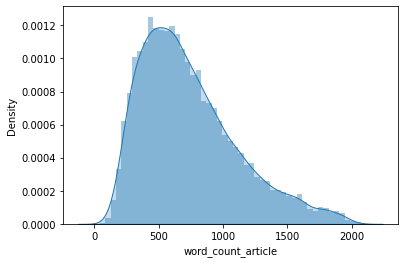

In [ ]:
## count
clean_val_df['word_count_article'] = clean_val_df['article'].apply(lambda x: len(nltk.word_tokenize(str(x))) )
## plot
sns.distplot(clean_val_df["word_count_article"], hist=True, kde=True, kde_kws={"shade":True})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 100.0)

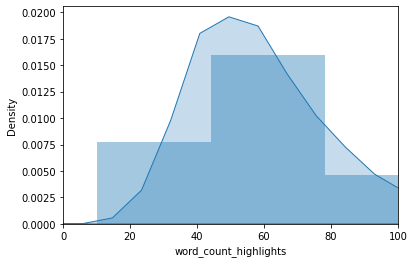

In [ ]:
## count
clean_val_df['word_count_highlights'] = clean_val_df['highlights'].apply(lambda x: len(nltk.word_tokenize(str(x))) )
## plot
sns.distplot(clean_val_df["word_count_highlights"], hist=True, kde=True, kde_kws={"shade":True})
plt.xlim(0, 100)

# Step 5: TextRank

In [ ]:
def textrank(corpus, ratio=0.2):    
  if type(corpus) is str:        
      corpus = [corpus]    
  summaries = [gensim.summarization.summarize(txt, ratio=ratio) for txt in corpus]    
  return summaries

In [ ]:
clean_test_df.iloc[:100]['article']

0     Ever noticed how plane seats appear to be gett...
1     A drunk teenage boy had to be rescued by secur...
2     Dougie Freedman is on the verge of agreeing a ...
3     Liverpool target Neto is also wanted by PSG an...
4     Bruce Jenner will break his silence in a two-h...
                            ...                        
95    As Zlatan Ibrahimovic famously believes the Wo...
96    Jameela spent £3,000 on having all her amalgam...
97    A paramedic who pretended he was gay to get cl...
98    Paris Saint-Germain face Nice on Saturday, hop...
99    You know the phrase "dodging a bullet"? Forget...
Name: article, Length: 100, dtype: object

In [ ]:
predicted_summaries = textrank(corpus=clean_test_df.iloc[:10]['article'], ratio=0.2)
for idx, summary in enumerate(predicted_summaries):
  print(f"Summary {idx+1}")
  print_with_line_limit(summary)

Summary 1
Tests conducted by the FAA use planes with a 31 inch pitch, a stMany economy seats on United Airline
s have 30 inches of room, while some airlines offer as little as 28 inches .
But these tests are con
ducted using planes with 31 inches between each row of seats, a standard which on some airlines has 
decreased, reported the Detroit News.

Summary 2
Next level drunk: Intoxicated Rahul Kumar, 17, climbed into the lions' enclosure at a zoo in Ahmedab
ad and began running towards the animals shouting 'Today I kill a lion!' Mr Kumar had been sitting n
ear the enclosure when he suddenly made a dash for the lions, surprising zoo security.

Summary 3
Dougie Freedman is set to sign a new deal at Nottingham Forest .

Summary 4
Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff compet
ition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna.
Neto i
s wanted by a number of top European clubs including Liverpo

We found a problem with specific articles, where its generated highlight is empty, as shown below:

In [ ]:
## Apply the function to corpus
## Note: takes long time, so we run on little data to see what happens
predicted_summaries = textrank(corpus=clean_test_df.iloc[1140]['article'], ratio=0.2)

In [ ]:
clean_test_df['article'][1140]

'Once Hillary Clinton\'s official announcement went online, social media responded in a big way, with terms like "Hillary Clinton," "#Hillary2016," and yes, even "#WhyImNotVotingforHillary" trending. Certainly, you couldn\'t go far on Twitter (even before Clinton tweeted her announcement), without an opinion or thought on her new campaign (there were over 3 million views of her announcment tweets in one hour, and 750,000 Facebook video views so far by Sunday evening). Some tweeted their immediate support, with one word: .'

In [ ]:
clean_test_df['highlights'][1140]

"Response across social media led to multiple trending topics for Hillary Clinton's presidential announcement . Some responded to her video and her new campaign logo ."

In [ ]:
predicted_summaries

['']

As can seen above, there is a problem with const ratio. We choose ratio=0.2, which gave us empty summaries on short articles. <br>
Suggested solution: for short articles decide an higher ration, for example: 0.5 (which promissing at least one sentence by assumption which an article contains at least 2 sentances)

In [ ]:
textrank(corpus=clean_test_df.iloc[1140]['article'], ratio=0.5)

['Once Hillary Clinton\'s official announcement went online, social media responded in a big way, with terms like "Hillary Clinton," "#Hillary2016," and yes, even "#WhyImNotVotingforHillary" trending.']

The code below gave revealed us to TextRank' weakness with generate summaries:

In [ ]:
## Note: need to run textrank func, which takes long time
# for i, pred_summary in enumerate(predicted_summaries):
#   if pred_summary=="":
#     print(f"index: {i}, \narticle: {test_df['article'][i]}, \nsummary: {test_df['highlights'][i]}\n")

Important notes: <br>
1) There is a limitation to TextRank: some of generated summaries are empty, althoght the ground-true is not! <br>
2) The ROUGE score can't be calced when the generated summary is empty. So we give the score 0!

In [ ]:
def evaluate_avg_rouge(summaries, predicted_summaries):
  assert len(summaries) == len(predicted_summaries), f"summary and predicted summary have no same length: {len(summaries)}, {len(predicted_summaries)}"
  assert len(summaries) > 0, f"num of summaries is 0!"
  if type(summaries) is str:        
    summaries = [summaries]
  if type(predicted_summaries) is str:        
    predicted_summaries = [predicted_summaries]

  # lst_summaries = [gensim.summarization.summarize(txt, ratio=ratio) for txt in corpus]

  avg_scores = {'rouge-1': 0, 'rouge-2': 0, 'rouge-L': 0}

  rouge_score = rouge.Rouge()
  for (txt, pred_txt) in zip(summaries, predicted_summaries):
    if pred_txt=='':
      score_1 = 0   
      score_2 = 0    
      score_L = 0
    else:
      scores = rouge_score.get_scores(refs=txt, hyps=pred_txt, avg=True)       
      score_1 = round(scores['rouge-1']['f'], 3)    
      score_2 = round(scores['rouge-2']['f'], 3)    
      score_L = round(scores['rouge-l']['f'], 3)

    avg_scores['rouge-1'] = avg_scores['rouge-1'] + score_1
    avg_scores['rouge-2'] = avg_scores['rouge-2'] + score_2
    avg_scores['rouge-L'] = avg_scores['rouge-L'] + score_L

  avg_scores['rouge-1'] = round(avg_scores['rouge-1'] / len(summaries), 2)
  avg_scores['rouge-2'] = round(avg_scores['rouge-2'] / len(summaries), 2)
  avg_scores['rouge-L'] = round(avg_scores['rouge-L'] / len(summaries), 2)
  return avg_scores

In [ ]:
# Note: it takes ~2 minutes:
# avg_scores = evaluate_avg_rouge(test_df["highlights"], predicted_summaries)

The results on test-set: <br>
rouge-1: 0.31 <br>
rouge-2: 0.13 <br>
rouge-L: 0.29 <br>
<bt>
We hope that a newer model, like BART may do better results.